In [1]:
#
# http://pandas.pydata.org/pandas-docs/stable/visualization.html
# http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
# https://github.com/ipython/ipywidgets/blob/master/docs/source/examples/Index.ipynb
#    
import urllib
import requests
import json
import io
from pandas.io.json import json_normalize
from ipywidgets import widgets
from IPython.display import display
import pandas as pd #this is how I usually import pandas
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

strategyUUID = None
dataAPIURL = "https://quantumconfigurations.com/dionysus/data_api.php?%s"
%matplotlib inline

text = widgets.Text(description="Strategy:")
display(text)

def handle_submit(sender):
    strategyUUID = text.value
    print(strategyUUID)
    
text.on_submit(handle_submit)

button = widgets.Button(description="Set Strategy")

display(button)

def handle_button_click(sender):
    strategyUUID = text.value
    
button.on_click(handle_button_click)

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.4.2 (default, Oct 19 2014, 13:31:11) 
[GCC 4.9.1]
Pandas version 0.18.1
Matplotlib version 1.5.1


In [3]:
params = urllib.parse.urlencode(
    {
        'op': 'GET_STRATEGY_POSITIONS',
        'strategy_id': '579e368e5ecb9'
    }
)
#params = b'start_dt=2016-07-28&end_dt=2016-07-29'

In [4]:
response = requests.get(dataAPIURL % params,
                        auth=requests.auth.HTTPBasicAuth(
                          'mosias',
                          'mosias98'))

#print(response.text)

In [5]:
positions = pd.read_csv(io.StringIO(response.text))

In [6]:
plt.style.available

['seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-bright',
 'grayscale',
 'seaborn-dark',
 'seaborn-ticks',
 'dark_background',
 'seaborn-talk',
 'seaborn-white',
 'seaborn-whitegrid',
 'bmh',
 'seaborn-pastel',
 'seaborn-dark-palette',
 'seaborn-muted',
 'seaborn-colorblind',
 'fivethirtyeight',
 'seaborn-paper',
 'classic',
 'seaborn-poster',
 'ggplot',
 'seaborn-notebook']

In [7]:
matplotlib.style.use('dark_background')

In [8]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

In [9]:
positions

,position_ts,pos_type,bidask,pos_size,shares,sma,rsi
0,2016-07-31 11:42:22,B,633.36,20,0.035762,632.364,58.33920
1,2016-07-31 11:41:44,S,633.45,20,0.000000,632.238,60.12020
2,2016-07-31 11:40:18,B,632.73,20,0.014000,633.460,28.25750
3,2016-07-31 11:43:33,S,632.95,20,0.000000,632.008,61.33500
4,2016-07-31 11:44:40,B,632.95,20,0.110000,632.160,61.33500
5,2016-07-31 11:52:34,S,633.62,20,0.000000,633.506,59.33880
6,2016-07-31 11:54:54,B,631.37,20,4.046070,632.750,33.14920
7,2016-07-31 11:55:05,S,633.14,20,0.000000,632.638,53.15190
8,2016-07-31 11:56:11,B,632.96,20,0.077770,632.506,51.20430
9,2016-07-31 12:02:56,S,632.61,20,0.000000,632.810,43.88190


Current size: [6.0, 4.0]


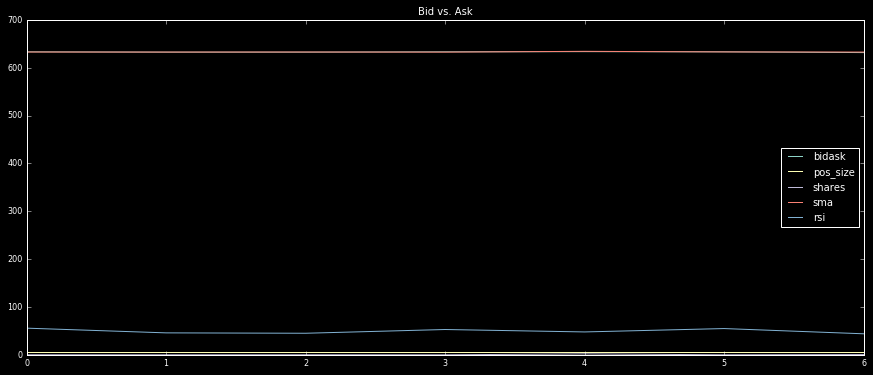

In [68]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size: %s" % fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

posPlot = positions.plot(kind='line', title='Bid vs. Ask', linewidth=1)